In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import add_dummy_feature

In [2]:
m = 200
rng = np.random.default_rng()
X = 2 * rng.random((m,1))
X_b = add_dummy_feature(X)
y = 4 + X + rng.standard_normal((m,1))
epochs = 10000

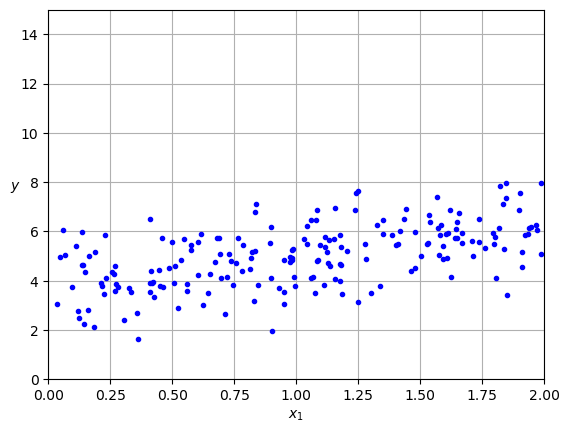

In [3]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.show()

In [4]:
theta =  rng.standard_normal((2,1))
eta = 0.1
theta

array([[ 0.99452226],
       [-0.93858187]])

In [5]:
X_b[1].reshape(-1,1).shape

(2, 1)

In [6]:
y[1].reshape(-1,1).shape

(1, 1)

In [7]:
J_log = np.zeros(epochs)

for i in range(epochs):
    rng_idx = random.choice(range(len(X_b)))
    
    X_b2 = X_b[rng_idx].reshape(1,-1)
    y2 = y[rng_idx].reshape(1,-1)
    J_log[i] = ((X_b2@theta - y2)**2).sum()
    gradients =  2 * X_b2.T @ (X_b2 @ theta - y2)
    theta -= eta*gradients

theta

array([[3.7322307 ],
       [1.36987454]])

In [8]:
y_prediccion = X_b @ theta

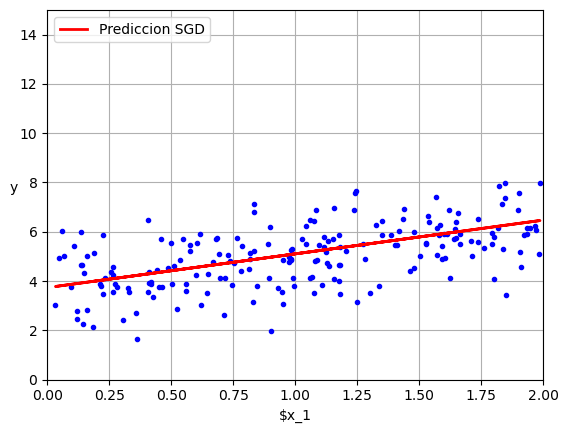

In [9]:
plt.plot(X, y, 'b.')
plt.plot(X, y_prediccion,'r-', linewidth=2, label='Prediccion SGD')
plt.xlabel('$x_1')
plt.ylabel('y', rotation=0)
plt.legend(loc='upper left')
plt.grid()
plt.axis([0,2,0,15])
plt.show()

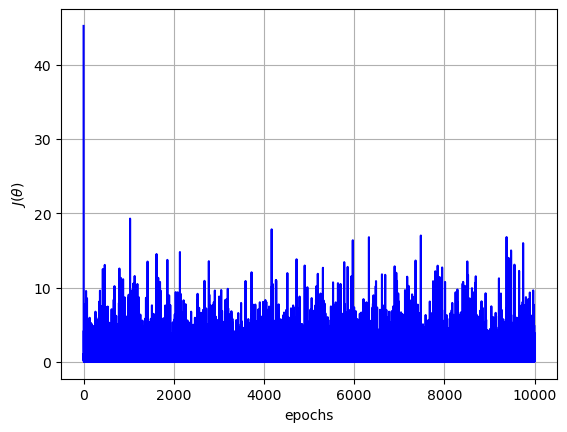

In [10]:
plt.plot(np.arange(epochs), J_log, 'b-')
plt.xlabel('epochs')
plt.ylabel(r'$J(\theta)$')
plt.grid()
plt.show()